# Make new feature by using `Fuel_Price` and `Unemployment`

I'm going to use below two informations:  
1. [**Misery Index**](https://www.investopedia.com/terms/m/miseryindex.asp)  

2. [**Relation between oil price to inflation**](https://www.investopedia.com/ask/answers/06/oilpricesinflation.asp)

<AxesSubplot:xlabel='Week', ylabel='Unemployment'>

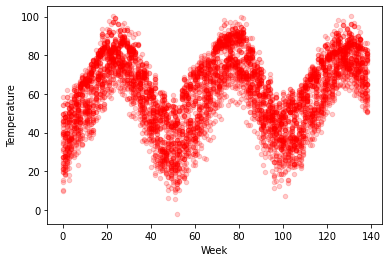

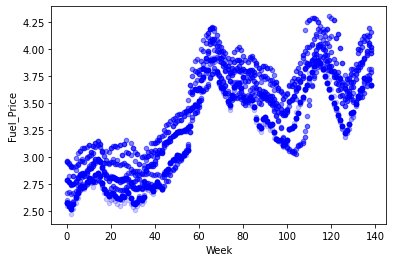

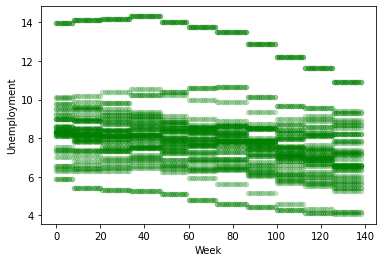

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")
submission = pd.read_csv("../dataset/sample_submission.csv")


def date_to_week(date):
    day, month, year = map(int, date.split('/'))
    t = dt.datetime(year, month, day) - dt.datetime(2010, 2, 5)
    return t.days // 7


train["Week"] = train["Date"].apply(date_to_week)
test["Week"] = test["Date"].apply(date_to_week)


social_features = ["Store", "Week","Temperature","Fuel_Price","Unemployment","Weekly_Sales"]
dummy = train[social_features].copy()
dummy.plot(kind="scatter", x='Week', y='Temperature', c="red", alpha = 0.2)
dummy.plot(kind="scatter", x='Week', y='Fuel_Price', c="blue", alpha = 0.2)
dummy.plot(kind="scatter", x='Week', y='Unemployment', c="green", alpha = 0.2)

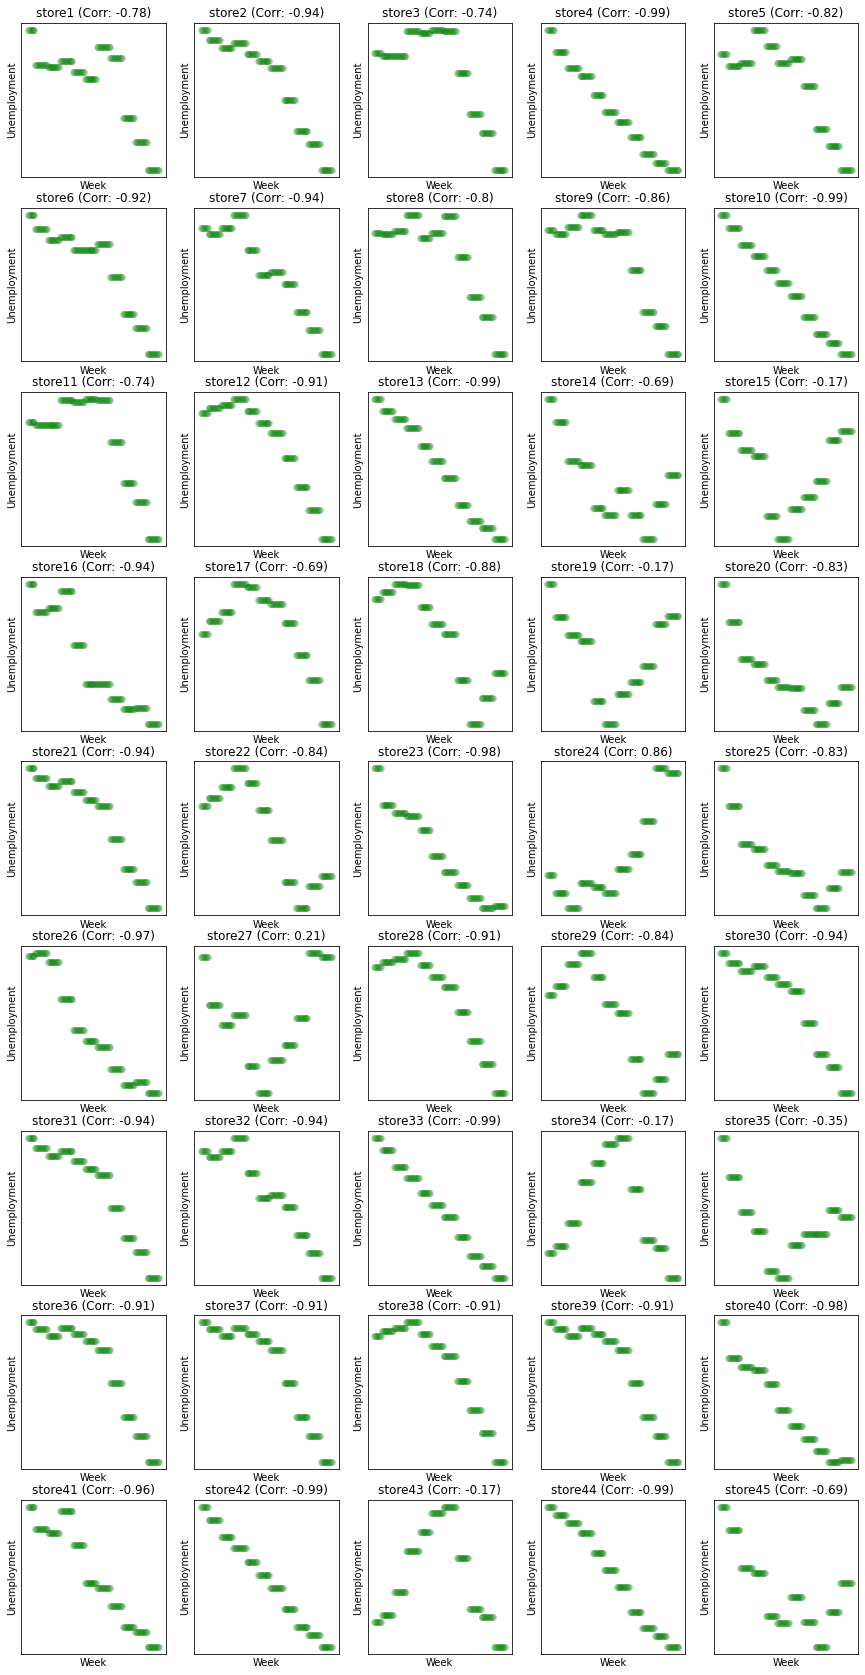

In [2]:
def each_store(x_feature, y_feature, color):
    
    plt.figure(figsize=(15, 30))

    for store in range(1, 46):
        store_df = dummy[dummy["Store"] == store]
        correlation = store_df.corr()[x_feature].loc[y_feature].round(2)

        # Set canvas of each plot
        ax = plt.subplot(9, 5, store)
        plt.title(f"store{store} (Corr: {correlation})") 
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)

        # Draw each plot
        plt.scatter(store_df[x_feature], y=store_df[y_feature], c=color, alpha=0.2)


#each_store("Week", "Temperature", "red")
#each_store("Week", "Fuel_Price", "blue")
each_store("Week", "Unemployment", "green")

### Result

`Temperature` and `Fuel_Price` have almost same trend for all stores.
But, `Unemployment` has a different trend for each stores.

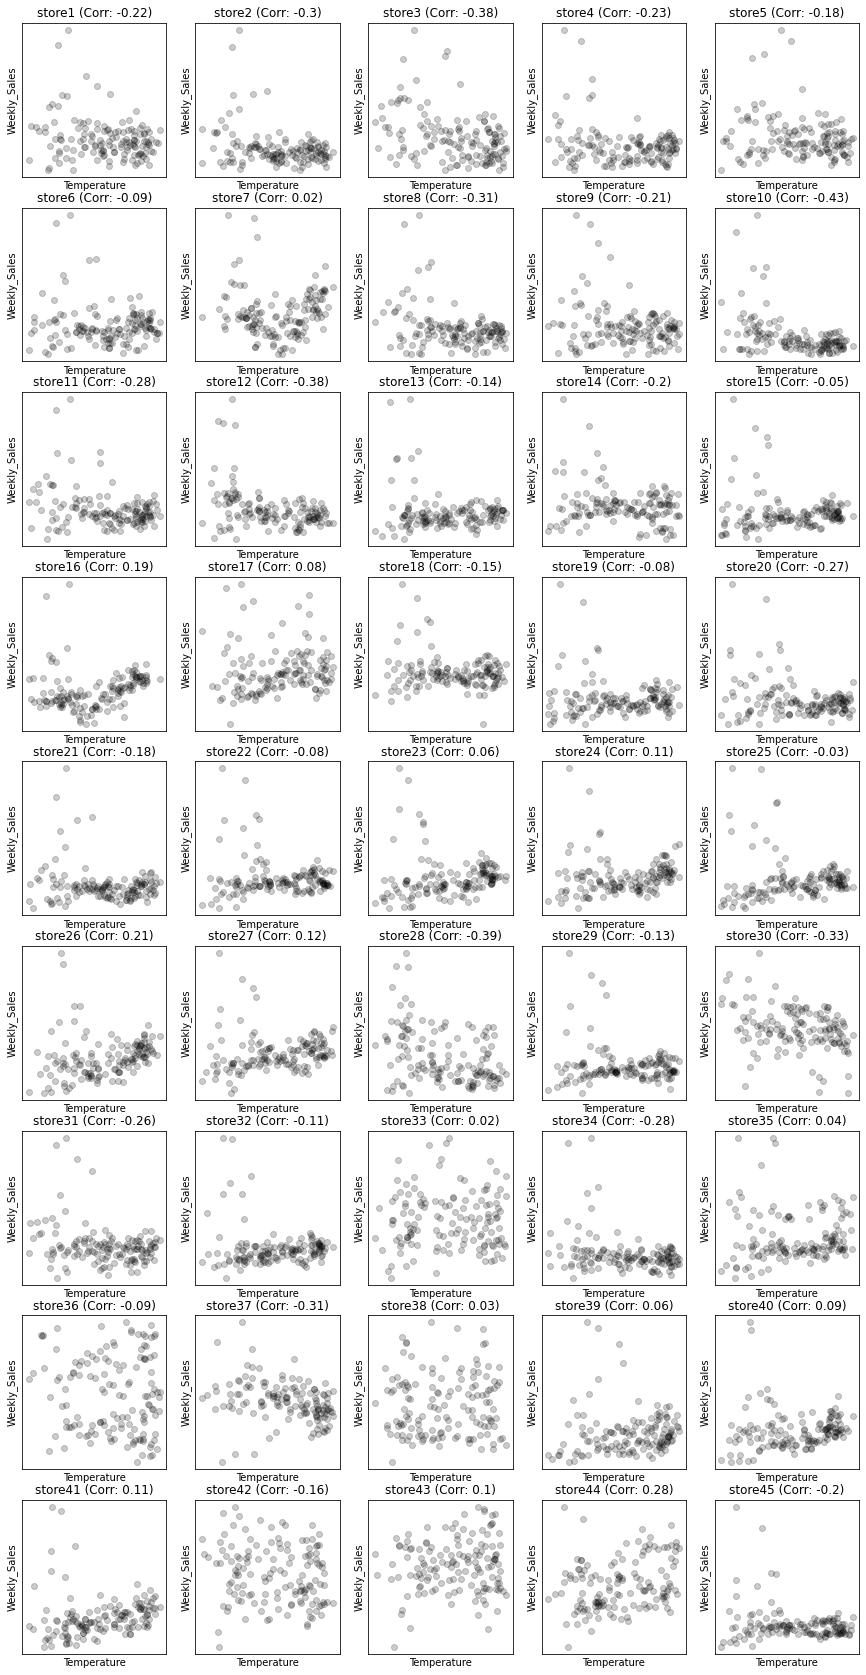

In [3]:
each_store("Temperature", "Weekly_Sales", "black")

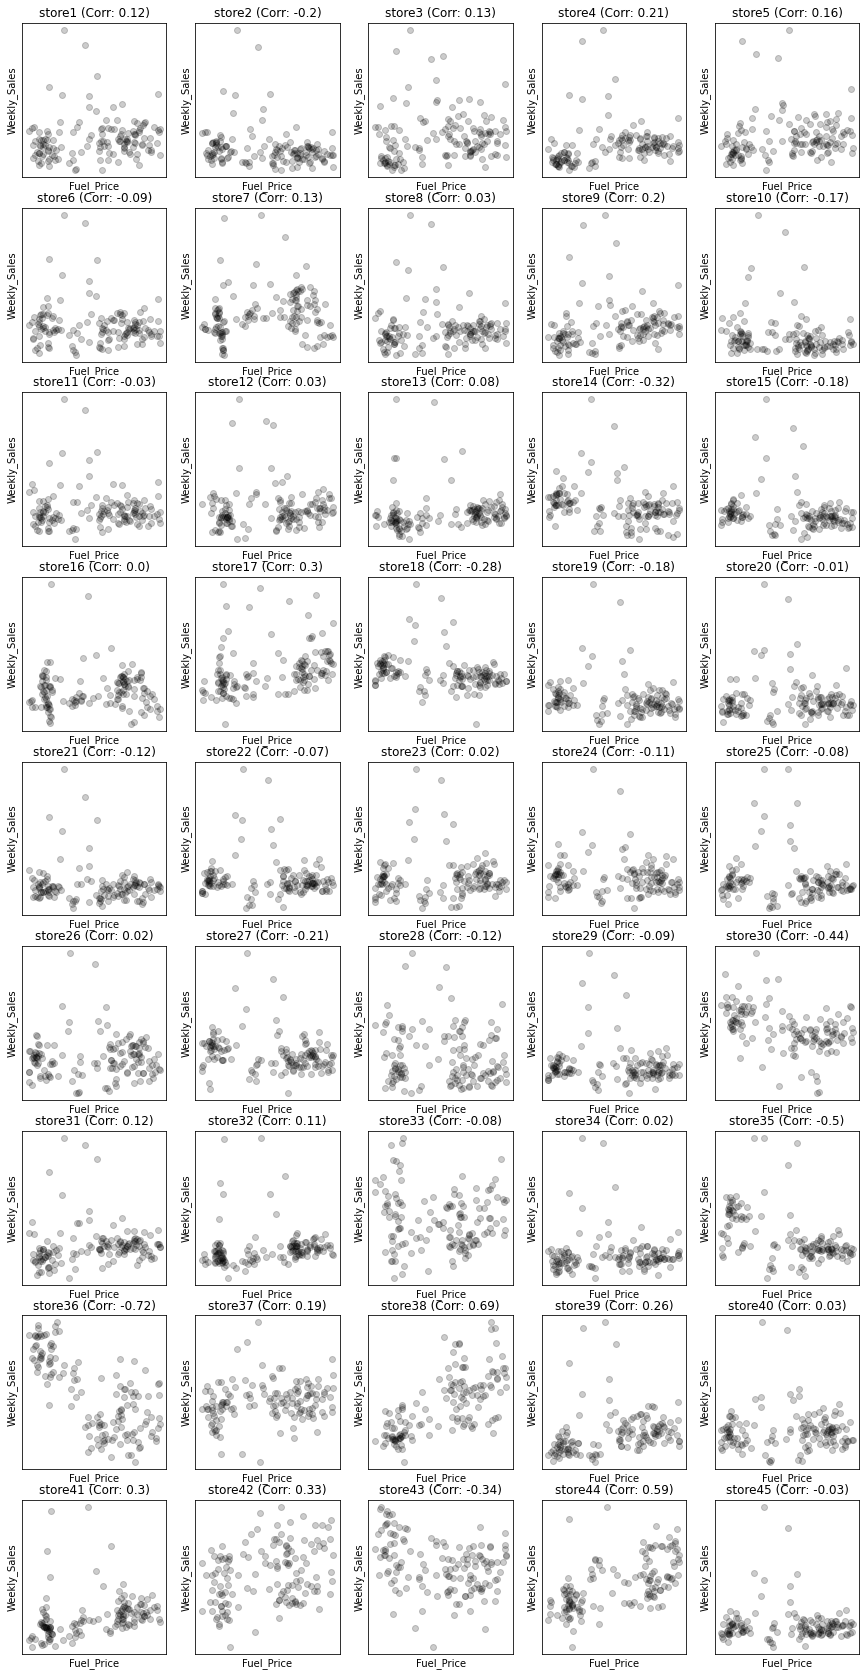

In [4]:
each_store("Fuel_Price", "Weekly_Sales", "black")

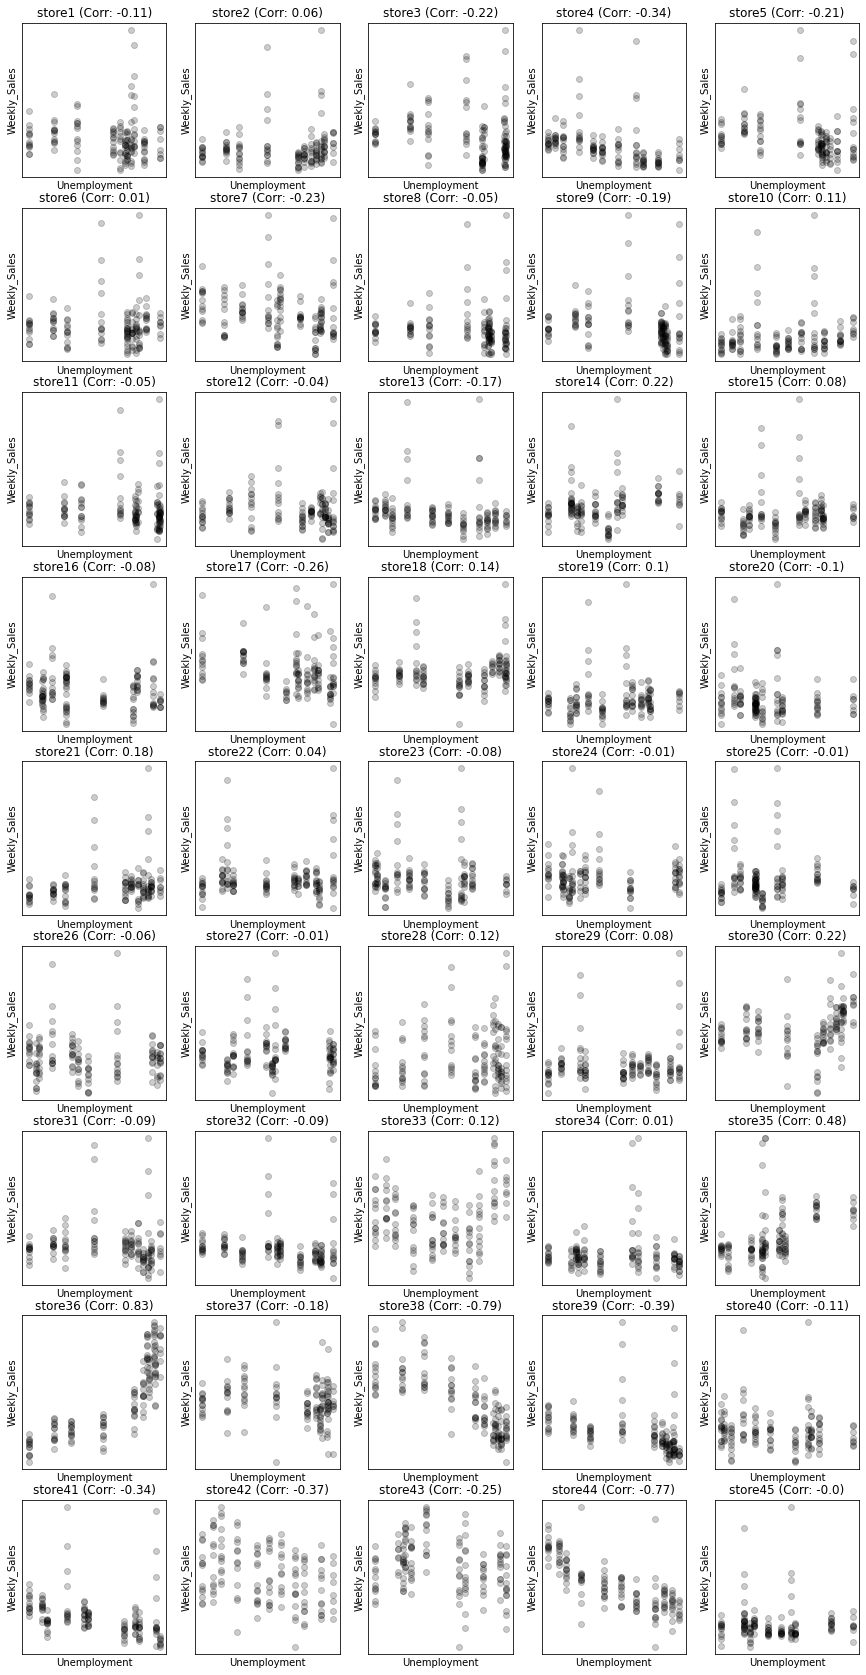

In [5]:
each_store("Unemployment", "Weekly_Sales", "black")

,Misery_Index
Week,
52,23.633424
53,25.677017
54,27.396678
55,27.973755
56,32.610181
...,...
134,10.457957
135,11.599146
136,11.896022


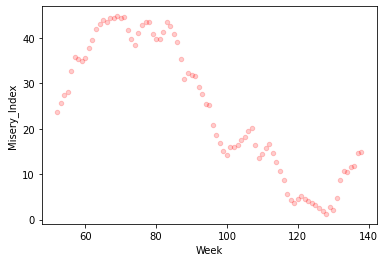

In [6]:
# Compare with prev year
misery_idx = pd.DataFrame()

for week in range(52, dummy["Week"].max() + 1):
    prev = dummy[dummy["Week"] == week - 52]["Fuel_Price"].mean()
    curr = dummy[dummy["Week"] == week]["Fuel_Price"].mean()
    unemployment = dummy[dummy["Week"] == week]["Unemployment"].mean()
    rising = (curr - prev) / prev * 100
    
    tmp = pd.DataFrame({"Week":[week], "Misery_Index":[rising + unemployment]})
    misery_idx = pd.concat([misery_idx, tmp])
    
    
misery_idx.plot(kind="scatter", x='Week', y='Misery_Index', c="red", alpha = 0.2)
misery_idx = misery_idx.set_index("Week")
misery_idx

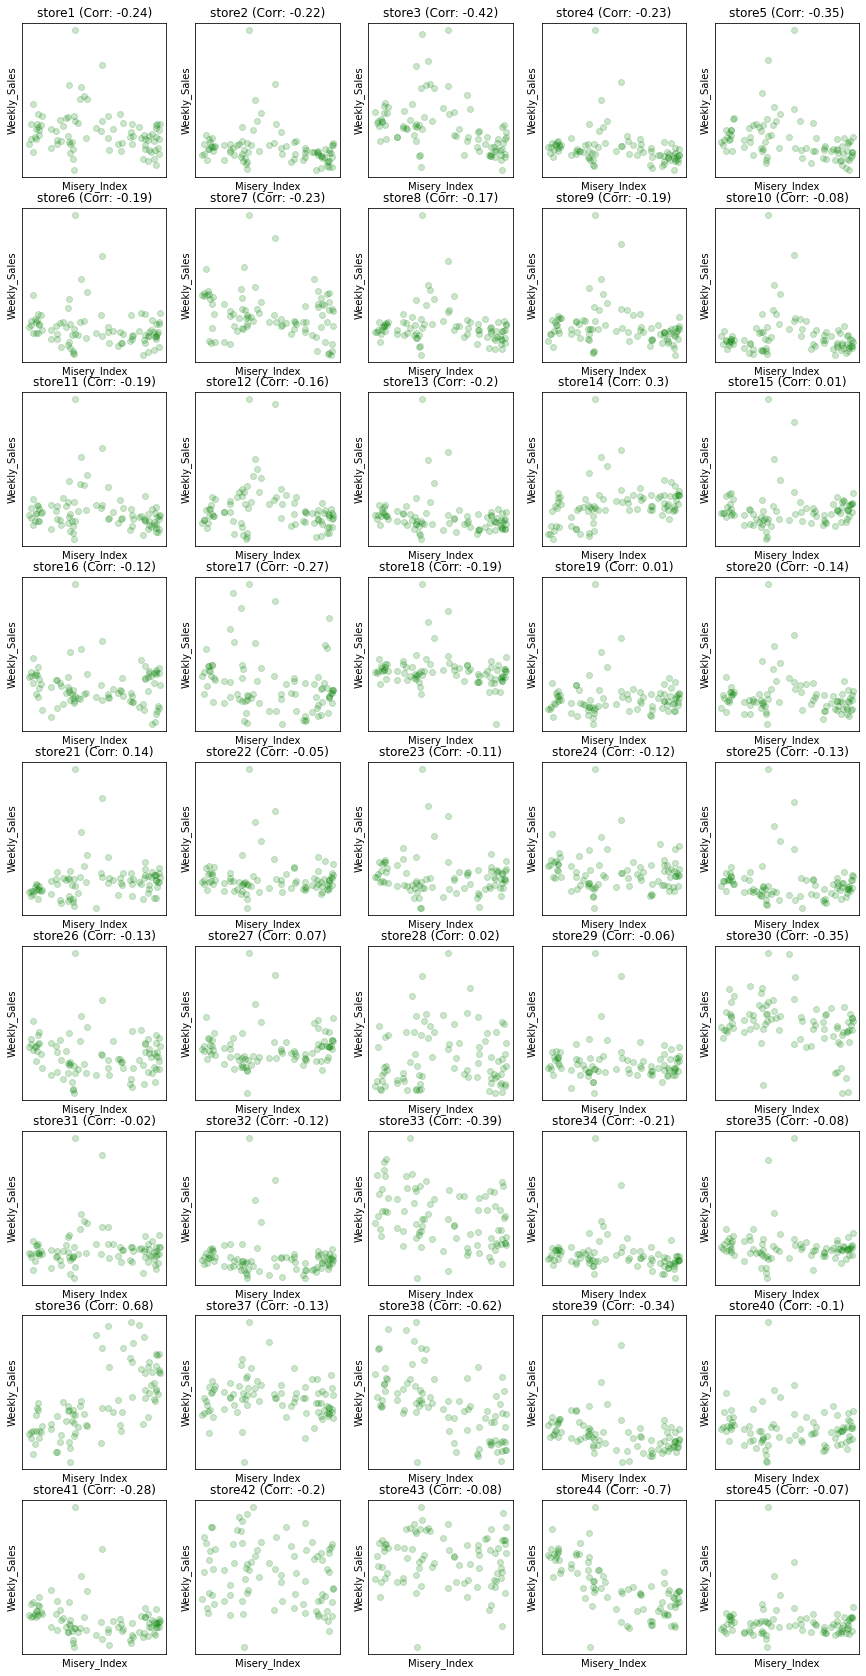

In [7]:
for i in range(len(dummy)):
    week = dummy.loc[i, "Week"]
    if week >= 52:
        dummy.loc[i, "Misery_Index"] = misery_idx.loc[week, "Misery_Index"]

dummy = dummy[dummy["Misery_Index"].notnull()]
each_store("Misery_Index", "Weekly_Sales", "green")